# Pymaceuticals Inc.
---

### Analysis

-# Observations/Inferences:

1. Treatment Efficacy: The box plot of tumor volume distribution for each treatment regimen shows that some treatments like Capomulin and Ramicane might work better than others like Infubinol and Ceftamin because their tumor volumes tend to be lower.

2. Gender Distribution: The pie charts displaying the distribution of female versus male mice indicate that there are about an equal number of male and female mice in the study, which is good for making sure the results apply to both genders.

3. Correlation between Mouse Weight and Tumor Volume: The scatter plot of mouse weight versus the average tumor volume for the Capomulin regimen suggests that as the mouse weight increases, the tumor volume also tends to increase. This is supported by the correlation coefficient and linear regression analysis, which show a positive relationship between mouse weight and tumor volume.

In tackling this challenge, I made the decision to utilize the Matplotlib documentation to gain a deeper understanding of the available functions and parameters. Additionally, I drew upon activities we've done in class to guide me through structuring the data, creating basic plots, and customizing labels and annotations. By leveraging these resources alongside my own efforts, I was able to navigate through the complexities and successfully generate meaningful visualizations that communicate the story within the data.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(combined_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [2]:
# Checking the number of mice.
# Checking the number of mice
num_mice = combined_data["Mouse ID"].nunique()
print("Number of mice:", num_mice)


Number of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
print("Duplicate Mouse IDs:", duplicate_mice_ids)


Duplicate Mouse IDs: ['g989']


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset="Mouse ID", keep="first")

In [5]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = cleaned_data["Mouse ID"].nunique()
print("Number of unique mice in the clean DataFrame:", num_unique_mice)

Number of unique mice in the clean DataFrame: 249


## Summary Statistics

In [6]:
# Group by "Drug Regimen" and calculate summary statistics
summary_statistics = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename columns for clarity
summary_statistics = summary_statistics.rename(columns={
    "mean": "Mean",
    "median": "Median",
    "var": "Variance",
    "std": "Standard Deviation",
    "sem": "SEM"
})

# Display the summary statistics DataFrame
print(summary_statistics)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Generate summary statistics for each regimen in a single line
summary_statistics_advanced = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe(percentiles=[])

# Transpose the DataFrame for better readability
summary_statistics_advanced = summary_statistics_advanced.transpose()

# Display the summary statistics DataFrame
print(summary_statistics_advanced)


Drug Regimen   Capomulin    Ceftamin   Infubinol    Ketapril    Naftisol  \
count         230.000000  178.000000  178.000000  188.000000  186.000000   
mean           40.675741   52.591172   52.884795   55.235638   54.331565   
std             4.994774    6.268188    6.567243    8.279709    8.134708   
min            23.343598   45.000000   36.321346   45.000000   45.000000   
50%            41.557809   51.776157   51.820584   53.698743   52.509285   
max            48.158209   68.923185   72.226731   78.567014   76.668817   

Drug Regimen     Placebo    Propriva    Ramicane    Stelasyn   Zoniferol  
count         181.000000  161.000000  228.000000  181.000000  182.000000  
mean           54.033581   52.322552   40.216745   54.233149   53.236507  
std             7.821003    6.507770    4.846308    7.710419    6.966589  
min            45.000000   45.000000   22.050126   45.000000   45.000000  
50%            52.288934   50.854632   40.673236   52.431737   51.818479  
max            73

## Bar and Pie Charts

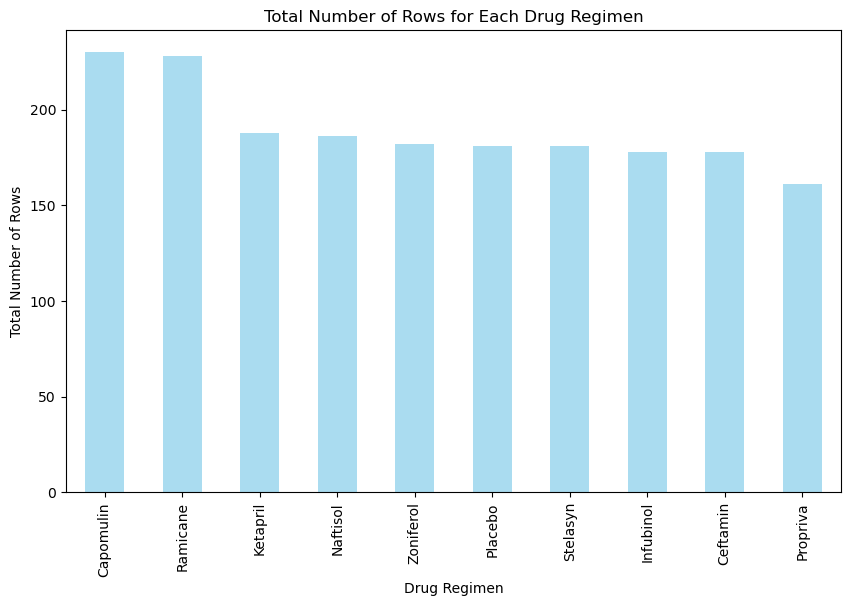

In [17]:
# Count the occurrences of each drug regimen
drug_regimen_counts = combined_data["Drug Regimen"].value_counts()

# Create a bar plot using Pandas plot() method
drug_regimen_counts.plot(kind="bar", color="skyblue", alpha=0.7, figsize=(10, 6))

# Set the title and labels
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")

# Show the plot
plt.show()


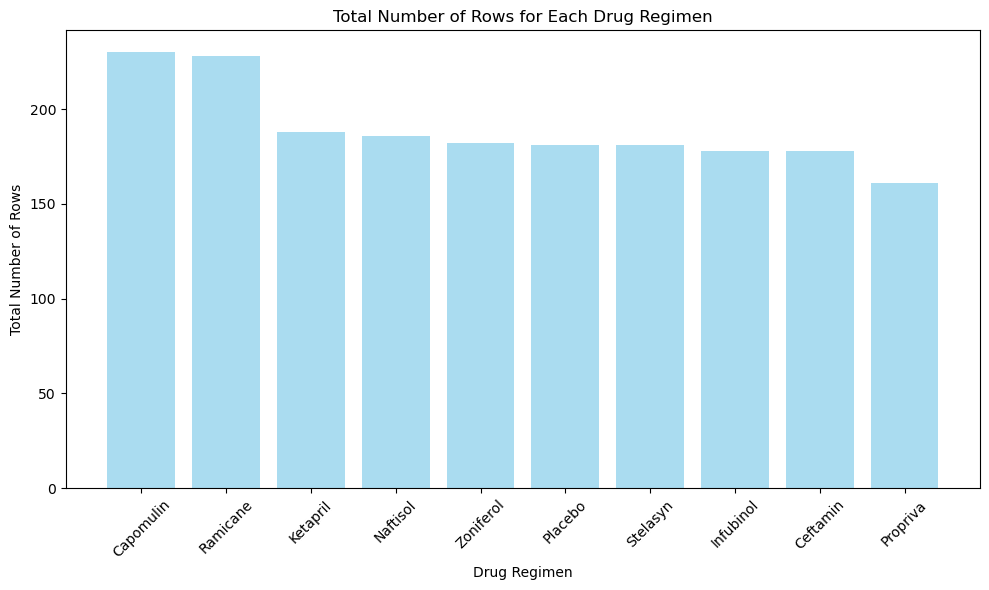

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Count the occurrences of each drug regimen
drug_regimen_counts = combined_data["Drug Regimen"].value_counts()

# Get the drug regimens and their counts
regimens = drug_regimen_counts.index
counts = drug_regimen_counts.values

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimens, counts, color="skyblue", alpha=0.7)

# Set the title and labels
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



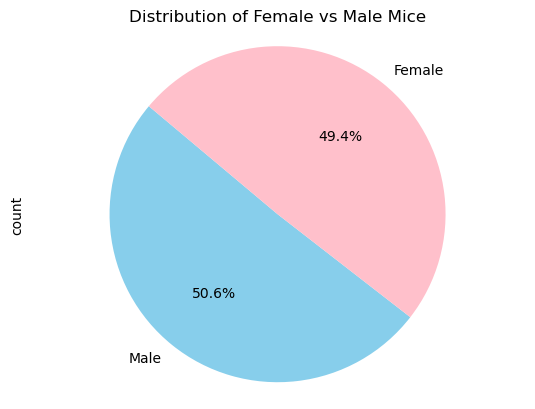

In [12]:
# Count the occurrences of each gender
gender_distribution = combined_data["Sex"].value_counts()

# Create a pie plot using Pandas plot() method
gender_distribution.plot(kind="pie", autopct='%1.1f%%', startangle=140, colors=["skyblue", "pink"])

# Set the title
plt.title("Distribution of Female vs Male Mice")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")

# Show the plot
plt.show()


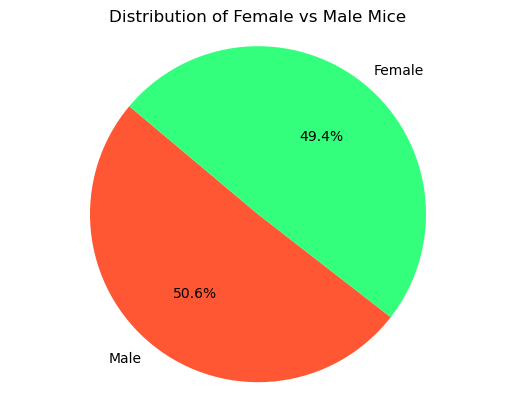

In [15]:
import matplotlib.pyplot as plt

# Count the occurrences of each gender
gender_distribution = combined_data["Sex"].value_counts()

# Get the labels and sizes for the pie plot
labels = gender_distribution.index
sizes = gender_distribution.values

# Define brighter colors (shades of red and green)
bright_red = '#FF5733'
bright_green = '#33FF7D'

# Create a pie plot using pyplot
plt.pie(sizes, labels=labels, colors=[bright_red, bright_green], autopct='%1.1f%%', startangle=140)

# Set the title
plt.title("Distribution of Female vs Male Mice")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")

# Show the plot
plt.show()



## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Filter the data for the specified treatment regimens
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = combined_data[combined_data["Drug Regimen"].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=["Mouse ID", "Timepoint"], how="inner")

# Display the final tumor volume for each mouse across the specified treatment regimens
print(final_tumor_volume)


   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419                 2  
1            65.525743                 1  
2            62.99

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Filter the data for the current treatment regimen
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Append the tumor volume data to the list
    tumor_vol_data.append(treatment_data)
    
    # Calculate quartiles, IQR, and bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Determine outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print results
    print(f"Results for {treatment}:")
    print(f"  - Lower Quartile: {lower_quartile}")
    print(f"  - Upper Quartile: {upper_quartile}")
    print(f"  - IQR: {iqr}")
    print(f"  - Lower Bound: {lower_bound}")
    print(f"  - Upper Bound: {upper_bound}")
    if not outliers.empty:
        print("  - Outliers:")
        print(outliers)
    else:
        print("  - No outliers")
    print("\n")


Results for Capomulin:
  - Lower Quartile: 32.37735684
  - Upper Quartile: 40.1592203
  - IQR: 7.781863460000004
  - Lower Bound: 20.70456164999999
  - Upper Bound: 51.83201549
  - No outliers


Results for Ramicane:
  - Lower Quartile: 31.56046955
  - Upper Quartile: 40.65900627
  - IQR: 9.098536719999998
  - Lower Bound: 17.912664470000003
  - Upper Bound: 54.30681135
  - No outliers


Results for Infubinol:
  - Lower Quartile: 54.04860769
  - Upper Quartile: 65.52574285
  - IQR: 11.477135160000003
  - Lower Bound: 36.83290494999999
  - Upper Bound: 82.74144559000001
  - Outliers:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64


Results for Ceftamin:
  - Lower Quartile: 48.72207785
  - Upper Quartile: 64.29983003
  - IQR: 15.577752179999997
  - Lower Bound: 25.355449580000002
  - Upper Bound: 87.66645829999999
  - No outliers




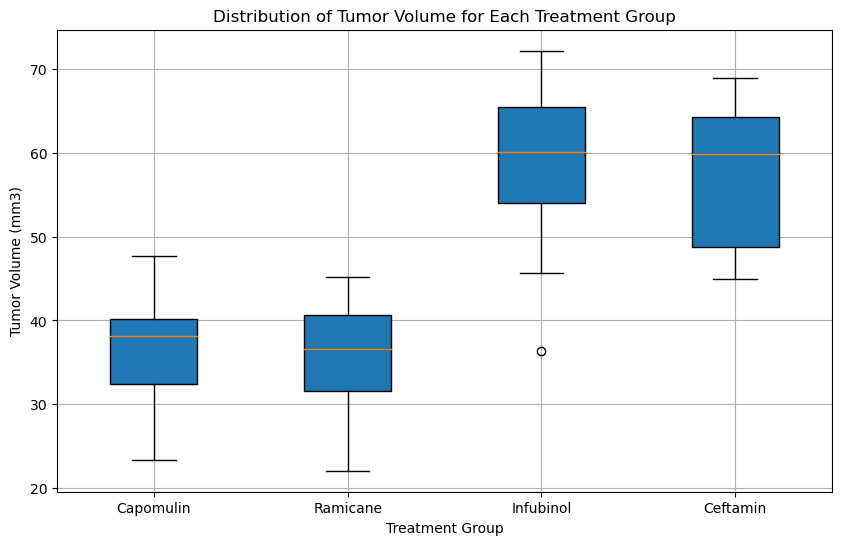

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Generate a box plot for the tumor volume of each treatment group
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True)

# Set the title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.show()


## Line and Scatter Plots

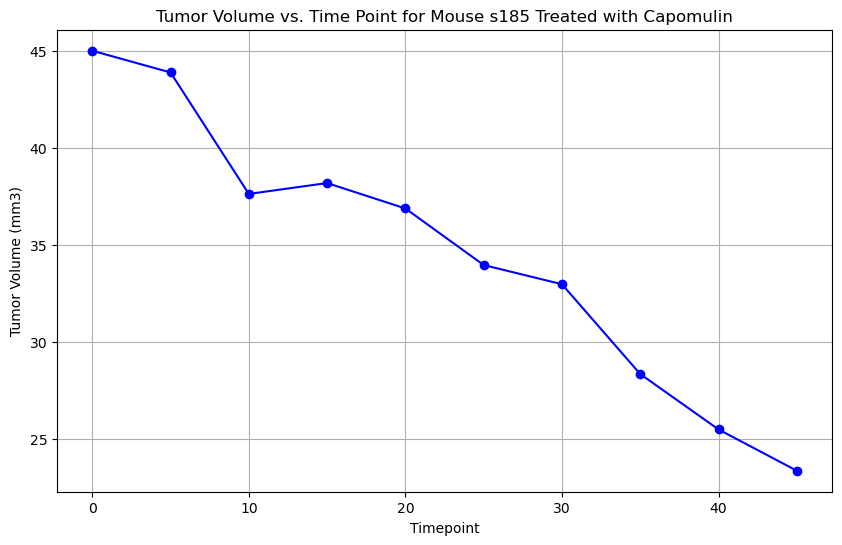

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt

# Filter the data for mice treated with Capomulin
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

# Select a single mouse treated with Capomulin (for example, the first mouse with ID 's185')
mouse_id = 's185'
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]

# Plot tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o', color='blue')

# Set the title and labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.grid(True)
plt.show()

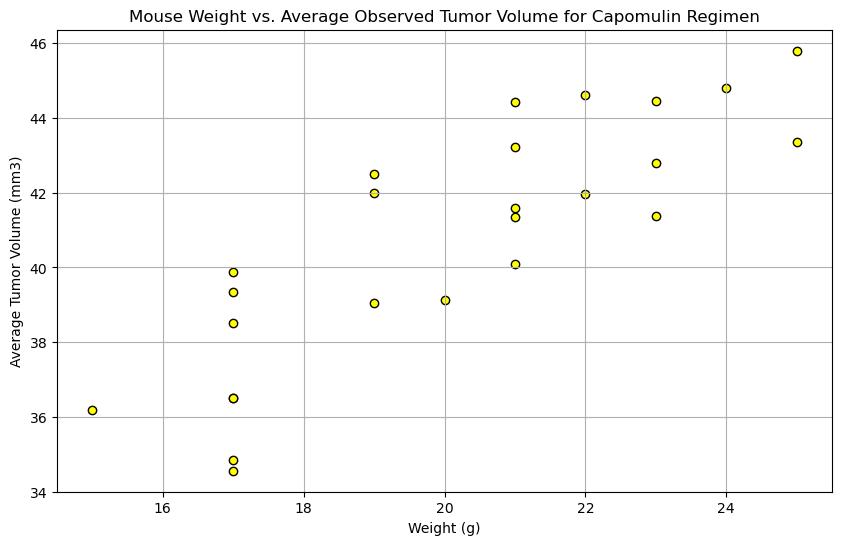

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

# Filter the data for mice treated with Capomulin
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the weight for each mouse (assuming weight is constant for each mouse during the treatment)
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Generate a scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='yellow', edgecolors='black')

# Set the title and labels
plt.title("Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.grid(True)
plt.show()


## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import scipy.stats as stats

# Calculate the correlation coefficient
correlation_coefficient = stats.pearsonr(mouse_weight, average_tumor_volume)[0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(mouse_weight, average_tumor_volume)

# Print the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)

# Print the linear regression model
print("Linear Regression Model:")
print("  - Slope:", slope)
print("  - Intercept:", intercept)
print("  - R-squared Value:", r_value**2)
print("  - p-value:", p_value)
print("  - Standard Error:", std_err)


Correlation Coefficient: 0.8419363424694719
Linear Regression Model:
  - Slope: 0.9544396890241048
  - Intercept: 21.552160532685008
  - R-squared Value: 0.7088568047708723
  - p-value: 1.3225722434712404e-07
  - Standard Error: 0.12754359033201323
